In [ ]:
#download CIFAR10 dataset from pytorch
import torch, torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)



Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc

In [ ]:
""" Pre-processing the dataset """
# get X input from trainset
X_train = trainset.train_data
print(X_train.shape)
# flatten (50000,32,32,3) size of X into (3072,50000) size of matrix
# normalize each pixel value to between 0 and 1
X_train = X_train.reshape(X_train.shape[0],-1).T / 255
print(X_train.shape)
# did the same thing on testset: got X input and flatten it
X_test = testset.test_data
print(X_test.shape)
X_test = X_test.reshape(X_test.shape[0],-1).T / 255
print(X_test.shape)
# get label y from trainset
y_train = trainset.train_labels
print(y_train)
# reshape y from list to numpy array
y_train = np.reshape(np.asarray(y_train),(50000,))
print(y_train.shape)
# did the same thing on testset: got y label and reshape it
y_test = testset.test_labels
y_test = np.reshape(np.asarray(y_test),(10000,))
print(y_test.shape)

# function takes X input and y labels and ratio to split validation set
def split(X, y, val_ratio):
  val_number = int(val_ratio * X.shape[1]) 
  random_indice = np.random.permutation(X.shape[1])
  return X[:, random_indice[val_number:]],y[random_indice[val_number:]], X[:, random_indice[:val_number]], y[[random_indice[:val_number]]]
# split validation set from training set
X_train, y_train, X_val, y_val = split(X_train, y_train, val_ratio = 0.1)


(50000, 32, 32, 3)
(3072, 50000)
(10000, 32, 32, 3)
(3072, 10000)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 

In [ ]:
class NeuralNetwork():
    
    def __init__(self, layer_dims):
        """
        Arguments:
        layer_dims -- A list contains the dimensions of each layer in CNN.
    
        Attributes generated:
        parameters -- a dict contains parameters "W1", "b1", ..., "WL", "bL"of each corresponding layer
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
        num_layers -- the length of layer_dims list
        """
     
        np.random.seed(1)
        self.num_layers = len(layer_dims)
        self.layer_dims = layer_dims
        self.parameters = {}
        L = len(self.layer_dims)
        for l in range(1, L):
            self.parameters['W'+ str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) / np.sqrt(layer_dims[l - 1])
            self.parameters['b'+ str(l)] = np.zeros([layer_dims[l], 1])
        self.X_val = None
        self.y_val = None
        

    def affineForward(self, A, W, b):
        """
         Implement the linear portion of CNN's forward propagation.

          Arguments:
          A -- activation from previous layer 
          W -- weights matrix
          b -- bias vector

          Returns:
          Z -- the input of the activation function
          cache -- a dict stores "A", "W" and "b" during forward propagation
        """
       
        return Z, cache

    def activationForward(self, Z, activation="relu"):
        """
         Implement the linear to activation portion of CNN's forward propagation

          Arguments:
          Z -- output from linear portion of forward propagation
          activation(type) -- "relu" in this case

          Returns:
          A -- the ouput of relu activation
          cache -- a dict stores "A", "W" and "b" during forward propagation
        """
        
        return A
            

    def forwardPropagation(self, X):
        """
        Implement the forward propagation 

        Arguments:
        X -- input from input layer as the starting point of forward propagation
  
        Returns:
        A -- the output of the activation function for each layer
        caches -- a list stores parameters (cache) for each layer during forward propagation
        """
       
        return A, caches
      
      
    def softmax(self,AL):
        """
        Implement the softmax function 

        Arguments:
        AL -- output of linear portion of the output layer (last layer)
  
        Returns:
        p -- softmax probability
        """
        m = AL.shape[1]
        p = np.exp(AL - np.max(AL, axis=0, keepdims=True))
        p /= np.sum(p, axis=0, keepdims=True)
        return p
      
      
    def costFunction(self, AL, y):
       """
        Implement the cross entrophy loss

        Arguments:
        AL -- output of linear portion of the output layer (last layer)
        y -- the labels of data
  
        Returns:
        cost -- the cross entropy loss value of each iteration of forward propagation
        """
       
        return cost
      
      
    def derivative_cost(self, AL, y): 
         """
        Implement the first step of back propagation: the derivative of cost function over AL

        Arguments:
        AL -- output of linear portion of the output layer (last layer)
        y -- the labels of data
  
        Returns:
        dAL -- the derivative of cost function over AL
        """
       
        return dAL

    def affineBackward(self, dA_prev, cache):
        """
        Implement the linear portion of backward propagation of one layer (layer l)

        Arguments:
        dAL -- derivative of the cost with respect to the activation output (of current layer l)
        cache -- releases A, W, b, Z values stored from the tuple during forward propagation of layer l

        Returns:
        dA -- Gradient of the cost over activation output from previous layer (layer l-1)
        dW -- Gradient of the cost over W for the current layer(layerl)
        db -- Gradient of the cost over b for the current layer(layer1)
        """
       
        return dA, dW, db
    
    def activationBackward(self, dA, cache, activation="relu"):
        """
        Implement the derivative of cost function over relu activation input Z

        Arguments:
        dA -- the gradient of cost function over relu activation ouput A
        cache -- a tuple stores A,W,b,Z for each layer, cache[3] is Z
        activation(type) -- 'relu'
  
        Returns:
        relu_backward -- the derivative of cost function over Z
        """
      
        relu_backward = self.derivative_relu(dA, cache[3]) 
        return relu_backward 
        
    def derivative_relu(self, dA, cache):
        """
        Implement the derivative calculation of relu activation during backpropagation

        Arguments:
        dA -- the gradient of cost function over relu activation ouput A
        cache -- a tuple stores A,W,b,Z for each layer, cache[3] is Z
  
        Returns:
        dZ -- the derivative of cost function over Z
        """
        
        return dZ

    def backPropagation(self, dAL, y, caches):
        """
        Implement backpropagation for each layer

        Arguments:
        dAL -- the gradient of cost function over the activation output of last layer: starting point for backpropagation
        y -- the labels of data
        caches -- a list stores tuple of A,W,b,Z for each layer
  
        Returns:
        grads -- a dict stores dWl and dbl for each layer l
        """
        
        return grads

    def updateParameters(self, grads, alpha):
        """
        Use gradient descent to implement parameters update
    
        Arguments:
        grads -- a dict stores all parameters gradients for each layer
        alpha -- learning rate
    
        Returns:
        self.parameters -- a dict stores updated parameters for W and b of each layer 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
        """
        
        return self.parameters
      
        
    def normalized_X(self,X):
        """
        Standardize the input data by substract mean and divided by variance
        
        Arguments:
        X -- input data
        
        Return:
        norm_X -- standardized data
        """
      
        standardize = {}
        standardize['mean'] = np.mean(X, axis = 1, keepdims = True)
        standardize['var'] = np.var(X, axis = 1, keepdims = True)
        norm_X = (X - standardize['mean']) / np.sqrt(standardize['var'])
        return norm_X
            
    def train(self, X, y, iters, alpha, batch_size, print_every):
        """
        It takes advantage of every function in this class to implement training and validation using CNN.
        
        Arguments:
        X -- input data
        y -- labels of data
        iters -- number of iterations to run
        alpha -- learning rate
        batch_size -- number of samples to assign to minibatch
        print_every -- number of iterations to print
        
        Return:
        Numbewr of iterations, train loss, train_acc, and valid_acc in every 100 iterations
        
        """
     
        X = self.normalized_X(X)
        for i in range(0, iters):
            X_batch, y_batch = self.get_batch(X, y, batch_size)
            AL, cache = self.forwardPropagation(X_batch)
            loss = self.costFunction(AL, y_batch)
            dAL = self.derivative_cost(AL, y_batch)
            grads = self.backPropagation(dAL, y_batch, cache)
            self.updateParameters(grads, alpha)
            if i % print_every == 0:
                train_acc = self.score(self.predict(X), y)
                val_acc = self.score(self.predict(self.X_val), self.y_val)
                print('iter={:5}, loss={:.4f}, train_acc={:.4f}, validation_acc={:.4f}'.format(i, loss, train_acc, val_acc))
                
    def predict(self, X):
        """
        It predicts the label given . input x
        Argument:
        X -- input of data
        Return:
        y_pred -- predicted label
        """
        X = self.normalized_X(X)
        AL, _ = self.forwardPropagation(X)
        y_pred = np.argmax(AL, axis = 0)
        return y_pred
      
      
    def score(self, y_pred, y_true):
        """
        It calculates the percentage of correct predicted labels over true labels
        
        Argument:
        y_pred-- predicted labels
        y_true -- true labels
        
        REturn: percentage of correct predicted labels
        """
        correct = np.mean(y_pred == y_true)
        return correct
      
    def load_validation_set(self, X_val, y_val):
        """
        Load validation set to CNN
        """
        self.X_val = X_val
        self.y_val = y_val
  

    def get_batch(self, X, y, batch_size):
        """
        Load minibatch to CNN
        """
       
        batch_index = np.random.randint(X.shape[1], size = batch_size)
        X_batch = X[:, batch_index]
        y_batch = y[batch_index]
        return X_batch, y_batch
   

In [ ]:
"""
Train CNN and validate at the same time
"""
# I tried iddifferent architecture of CNN and it turns out 3 hidden layers of 1024, 256, 128 neurons gives me best reslt
# I also tried different learning drate and batch size and it turns out alpha=1 and batch_size=100 gives me best result
# In this trained CNN, I reach 54.12% validation accuracy and 52.99% test accuracy in the end.
layer_dims = [X_train.shape[0], 1024, 256, 128, 10]
CNN = NeuralNetwork(layer_dims)
CNN.load_validation_set(X_val, y_val)
CNN.train(X_train, y_train, iters=10000, alpha=1, batch_size=100, print_every=100)

iter=    0, loss=2.3617, train_acc=0.0999, validation_acc=0.1064
iter=  100, loss=2.0751, train_acc=0.2959, validation_acc=0.2948
iter=  200, loss=1.8461, train_acc=0.3493, validation_acc=0.3530
iter=  300, loss=1.7975, train_acc=0.3786, validation_acc=0.3762
iter=  400, loss=1.6927, train_acc=0.4006, validation_acc=0.4002
iter=  500, loss=1.7257, train_acc=0.4153, validation_acc=0.4088
iter=  600, loss=1.6456, train_acc=0.4278, validation_acc=0.4176
iter=  700, loss=1.7837, train_acc=0.4386, validation_acc=0.4272
iter=  800, loss=1.7971, train_acc=0.4468, validation_acc=0.4314
iter=  900, loss=1.6531, train_acc=0.4553, validation_acc=0.4396
iter= 1000, loss=1.6428, train_acc=0.4612, validation_acc=0.4514
iter= 1100, loss=1.5892, train_acc=0.4674, validation_acc=0.4504
iter= 1200, loss=1.6917, train_acc=0.4736, validation_acc=0.4532
iter= 1300, loss=1.4878, train_acc=0.4779, validation_acc=0.4560
iter= 1400, loss=1.4416, train_acc=0.4837, validation_acc=0.4680
iter= 1500, loss=1.4070, 

In [ ]:
#test set accuracy
y_pred = CNN.predict(X_test)
test_acc = CNN.score(y_pred, y_test)
print('test_acc ={:4}'.format(test_acc))

test_acc =0.5299


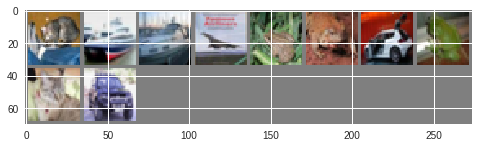

testlabels:   cat  ship  ship plane  frog  frog   car  frog   cat   car
predlabels:   cat  ship plane plane  deer  frog   cat  frog   dog   car


In [ ]:
#visualize the prediction result of trained CNN on some of test set images
import torchvision
import torchvision.transforms as transforms
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("testlabels: " + ' '.join('%5s' % classes[labels[j]] for j in range(10)))
print("predlabels: " + ' '.join('%5s' % classes[y_pred[j]] for j in range(10)))